In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# additional packages needed
import time

# to run on IBM computer
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.tools import backend_monitor

# import matplot lib
import matplotlib as plt

## Circular Quantum Walks
The circular quantum random walk operates similarly to the quantum random walk on a number line except that the "end" states are connected to one another. For example, for a 2 position qubit which has 4 states or nodes, the |00> and |11> states are connected to each other and movement is allowed across them. So if the walker starts in the |00> state, it can move to the |11> state or to the |01> state. Similarly, a walker starting in the |11> state can move to the |00> state or to the |10> state.

### Default Circular Quantum Walk
The circuit build in the paper, which is refered to as the default circuit, only used a hadamard gate to split the coin at the beginning of the steps. This means that the walker either moves left or right and across multiple steps cannot switch directions left and right. The behavior of this circuit is shown below. 

In [ ]:
# one step of a quantum random walk on a circle 3 qubits (includes the qubit for the coin)
qc = QuantumCircuit(3, 2)

# we only want one coin operator
# check my number line to see if I want to look through the hadamard gate again
def circDefault(steps):
    # the circuit in the paper has the h gate only once at the beginning
    # only one decision to go left or right is made
    qc.h(2)
    for i in range(steps):
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
    # reverse this order (be consistent and do this for the other project)
    qc.measure([0, 1], [1, 0])

circDefault(1)
qc.draw()

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We start in the |00> state so we can move to the |11> state or to the |01> state with equal probability.

In [ ]:
# try 2 steps
# only H gate at the beginning
qc = QuantumCircuit(3, 2)
circ(2)
qc.draw()

In [ ]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Using the default circuit, only 1 state is allowed. Since there is only 1 coin operation, the walker "commits" to going "right" or "left" and can't change directions once it's taken that initial step. Quantum mechanically this means that the coin is created through a superposition and each element of the superposition begins its journey through the increamentors and decreamentors which send the walker "right" or "left" through the use of the CNOT gates. The walker will go "right" and "left" but each superposition can then only go in that one direction and it can't switch directions. This is why the only allowed state is the |10> state because starting from |00> and moving 2 steps "right" or "left" both end up in the |10> state. 

In [ ]:
# try 3 steps
qc = QuantumCircuit(3, 2)
circ(3)

In [ ]:
# this is wrong!
qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Now that 3 steps are taken, there are again 2 allowed states as the qubit can travel from |00> 3 steps "left" to |01> or 3 steps right to |11>.

In [ ]:
# try 4 steps
qc = QuantumCircuit(3, 2)
circ(4)

In [ ]:
qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Again 4 steps only yields one allowed state which is the inital state |00> because 4 steps to the "right" or "left" both land on |00>. Any steps below 4 which resets to the initial state should follow the same pattern as the states descriped above.

### Moving left and right at each step attempt 1
This is the first attempt in creating a circuit which allows the walker to change directions after its initial step. The circuit below is alterned from the default circuit so that at each step taken, the circuit is then able to travel "left" or "right" after each step it takes. This creates different allowed states then the default circuit above. The first attempt, tries to achieve this through adding a H gate to each iteration. The attempt fails at 3 steps.

In [ ]:
# one step of a quantum random walk on a circle 3 qubits (includes the qubit for the coin)
qc = QuantumCircuit(3, 2)

def circ(steps):
    for i in range(steps):
        # test the behavior of the circuit when the H gate is in every step.
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
    # reverse this order (be consistent and do this for the other project)
    qc.measure([0, 1], [1, 0])

circ(1)
qc.draw()

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We get the same result as before for the 1 step because the choice is still only to travel "left" or "right" and no "additional" coins are added.

In [ ]:
# now look at the 2 step circuit
qc = QuantumCircuit(3, 2)
circ(2)

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Now the circuit can travel back to the initial state and there are two allowed states (|00> and |10>) instead of only 1 allowed state (|10>). This method appears to "fix" the 2 step case.

In [ ]:
# try 3 steps
qc = QuantumCircuit(3, 2)
circ(3)

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

After 3 steps the circuit starts to break down and only 1 state is allowed (|01>). The circuit is not allowed to travel 3 qubits in a row it seems. The third H gate forces the particule to change direction after every step which is not the desired outcome.

In [181]:
# examine the behavior at 4 steps
qc = QuantumCircuit(3, 2)
circ(4)

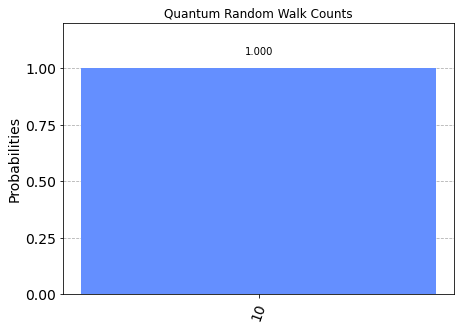

In [182]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The only allowed state is the |10> state. It appears the circuit forces the walker to change direction after 2 steps are taken.

In [183]:
qc = QuantumCircuit(3, 2)
circ(5)

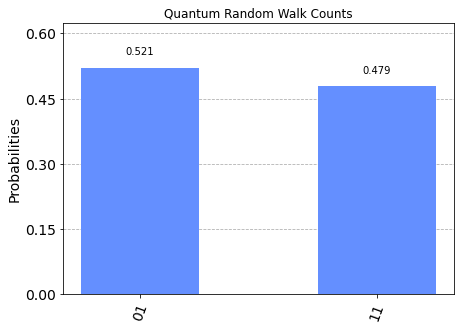

In [184]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

5 steps has the same distribution as 1 step. The distribution step pattern resets every 4 steps. This circuit forces the walker to change directions for the 3 step case. For the 2 step case which behaves as desired, the walker is forced to travel in the same direction if the first 2 steps went in opposite directions and if the first two steps went in the same direction it forces the walker to change directions.

### Moving left and right at each step attempt 2
The second attempt tests the circuit for which the first 2 steps taken have a H gate and the remaining steps do not have H gates. The circuit works as desired: after each step the walker can flip the coin again and move "right" or "left".

In [ ]:
qc = QuantumCircuit(3, 2)

# this function has H gates present in the first two steps always and then removes H gates
# for all remaining steps
# the behavior is what we would expect for this type of circuit
def circ2(steps):
    # just the base circuit for 1 step
    if steps == 1:
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
    if steps > 1:
        # first iteration
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
        # second iteration has a hadamard gate
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
        for i in range(steps-2):
            qc.cx(2, 1)
            qc.ccx(2, 1, 0)
            qc.x(2)
            qc.cx(2, 1)
            qc.x(1)
            qc.ccx(2, 1, 0)
            qc.x(1)
            qc.x(2)
    
    # measure at the end always
    qc.measure([0, 1], [1, 0])
    
# example of this working as intended
circ2(3)

qc.draw()

The 1 step circuit is the same for all the variations. The 2 steps circuit is the same as in attempt 1 as the circuit setup did not change. Steps 3, 4, and 5 are shown below.

In [ ]:
qc = QuantumCircuit(3, 2)
circ2(3)

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The allowed states are |01> and |11>. These are the same as in the default circuit: when the walker is allowed to change directions it can still only end up in the |01> and |11> states.

In [ ]:
qc = QuantumCircuit(3, 2)
circ2(4)

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Now the allowed states are |00> and |10> as opposed to the only allowed state being the initial state |00> as is the case for the default QRW. After each step, the walker is allowed to travel backwards. Each instance of the walker not taking all its steps in the same direction results in the state |10>.

In [ ]:
qc = QuantumCircuit(3, 2)
circ2(5)

In [ ]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

At 5 steps the process repeats itself and the resulting allowed states are the same as for 1 step.

NEXT STEPS
Implement on IBM computer
Look at different IC
Try a weighted coin (Instead of superposition with H gate use something that weights it in one direction)
Try a 3 qubit circular position (could compare this with the circuit from before)